# ¡Hola, Stephania!  

Mi nombre es Carlos Ortiz, soy code reviewer de Practicum y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

Para lograr este objetivo, debeMOS explorar los datos, tratar  los valores problemáticos ya sea valores ausentes, duplicados o atípicos. Además de esto, crear variables y gráficos que facilitan la lectura y comprensión del análisis.

## Inicialización

In [132]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Cargar datos

In [133]:
# Carga el archivo de datos en un DataFrame

try:
    vehicles = pd.read_csv('vehicles_us.csv')
except:
    vehicles = pd.read_csv('/datasets/vehicles_us.csv')

### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

In [134]:
# imprime la información general/resumida sobre el DataFrame
vehicles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [135]:
# imprimir una muestra de datos

vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


**Observaciones Generales:**
- Se hace evidente valores ausentes en las columnas: odometer, paint_color y is_4wd. Tendremos que veriguar si es error en los datos, y si estos valores influyen en el precio del vehiculo. 

- Averiguaremos si hay valores ausentes en otras columnas que no se vean inicialmente y sus valores.

- La columna de precio es la variable objetivo y existen 12 columnas más que son características; donde 4 de ellas son numéricas y las otras 9 son categóricas.

- La columna date_posted debe convertirse a un formato date_time.

### Conclusiones y siguientes pasos

1. Se hace evidente que existen demasiados valores ausentes en nuestros datos. Es muy pronto para saber si podemos eliminarlos, o si neceistamos buscar la media o mediana para reemplazarlos de la mejor manera posible. 
2. La columna 'is_4wd' es la columna con mayor cantidad de valores ausentes y puede ser problemático para nuestro análisis. Descubriremos como rellenar sus valores ausentes.
3. La columna 'date_posted' es de tipo object y tendremos que convertir el contenido de la columna en fechas que Python entenderá.

## Tratar los valores ausentes (si hay)

In [136]:
# Cantidad de valores ausentes
vehicles.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [137]:
# Comprobar el porcentaje de valores ausentes
vehicles.isna().mean()

price           0.000000
model_year      0.070238
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.179854
is_4wd          0.503697
date_posted     0.000000
days_listed     0.000000
dtype: float64

**Observación**

1. Hay un total de 51525 entradas, lo cual debería ser igual para cada columna. Sin embargo observamos 5 columnas con una menor cantidad de registros, es decir, con valores ausentes. Estos parámetros son:
- model_year
- cylinders
- odometer
- paint_color
- is_4wd

2. De estos parámetros, 'paint_color' podemos asumir instantameamente que sus valores ausentes serán reemplazados con una nueva categoría llamada 'other' , ya que no hay forma de obtener la mediana de una variable categórica.

3. El parámetro 'odometer' contiene valores ausentes significativos, por lo que reemplazaremos el valor faltante con la mediana o media de la columna.

4. A el parámetro 'is_4wd' le falta más del 50 % de sus datos, mientras que a la variable model_year solo le falta un 7 % de los valores.

**- Parámatro: 'model_year'**

In [138]:
print(f'El porcentaje de valores faltantes en la variable model_year: {vehicles["model_year"].isna().mean():.2%}.')

El porcentaje de valores faltantes en la variable model_year: 7.02%.


In [139]:
# Comprobar si existe una tendencia que justifique los valores faltantes en 'model_year'
vehicles[vehicles['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


**Observaciones:**
Tras el análisis, no parece haber ninguna tendencia a justificar la falta de valores en la variable 'model_year'. Sin embargo, la cantidad de valores ausentes no alcanza ni el 10% de todo el DataFrame. Sin embargo, no lo eliminaremos sino reemplazarlos por la mediana. 

In [140]:
# Substituir los valores ausentes en model_year
nonan_model_year = vehicles.groupby(['model'])['model_year'].transform('median')
vehicles['model_year'].fillna(nonan_model_year, inplace = True)
vehicles['model_year'].isna().sum()

0

**- Parámatro: 'cylinders'**

In [141]:
print(f'El porcentaje de valores faltantes en la variable cylinders: {vehicles["cylinders"].isna().mean():.2%}.')

El porcentaje de valores faltantes en la variable cylinders: 10.21%.


In [142]:
# Comprobar si existe una tendencia que justifique los valores faltantes en 'model_year'
vehicles[vehicles['cylinders'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,NaN,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,NaN,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,NaN,2018-06-22,28


In [143]:
# Substituir los valores ausentes en model_year
nonan_model_year = vehicles.groupby(['model'])['cylinders'].transform('median')
vehicles['cylinders'].fillna(nonan_model_year, inplace = True)
vehicles['cylinders'].isna().sum()

0

**Observación:**

Una vez más, el modelo del vehículo (model) se utiliza para completar los valores faltantes. Esta vez en nuestro parametro cilindros (cylinders), ya que los modelos ayudan determinan la fabricación y las características del motor, como el número de cilindros.

**- Parámatro: 'odometer'**

In [144]:
print(f'El porcentaje de valores faltantes en la variable odometer: {vehicles["odometer"].isna().mean():.2%}.')

El porcentaje de valores faltantes en la variable odometer: 15.32%.


In [145]:
# Comprobar si existe una tendencia que justifique los valores faltantes en 'model_year'
vehicles[vehicles['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,NaN,1.0,2019-01-25,69
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


In [146]:
vehicles.groupby(['condition'])['odometer'].median()

condition
excellent    104230.0
fair         181613.0
good         129000.0
like new      72982.5
new            8002.0
salvage      142673.5
Name: odometer, dtype: float64

**Observación:**
- Vamos a usar el parametro 'condition' para encontrar una mejor influencia para rellenar los valores ausentes en odómetro ya que uno de los factores más importantes que afectan la depreciación del vehículo es el kilometraje.
- Un vehículo con bajo kilometraje mantiene su condición "new" por más tiempo, mientras que un vehículo con alto kilometraje está sujeto a daños por depreciación. Por lo tanto, utilizaremos la variable de condición para completar los valores que faltan en el odómetro.

In [147]:
# Substituir los valores ausentes en model_year
nonan_model_year = vehicles.groupby(['condition'])['odometer'].transform('median')
vehicles['odometer'].fillna(nonan_model_year, inplace = True)
vehicles['odometer'].isna().sum()

0

**- Parámatro: 'paint_color'**

In [148]:
print(f'El porcentaje de valores faltantes en la variable paint_color: {vehicles["paint_color"].isna().mean():.2%}.')

El porcentaje de valores faltantes en la variable paint_color: 17.99%.


In [149]:
# Comprobar si existe una tendencia que justifique los valores faltantes en 'paint_color'
vehicles[vehicles['paint_color'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,NaN,NaN,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,NaN,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,NaN,2019-02-27,73
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,1.0,2019-04-11,25
51519,11750,2015.0,honda accord,excellent,4.0,gas,104230.0,automatic,coupe,NaN,NaN,2018-11-24,89


In [150]:
vehicles['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

**Observación:**
Debido a que 'paint_color' es un parámetro categorico, es decir, no es una variable cuantitativa, no podemos sacarle la mediana a esta variable. Sin ponernos a adivinar que posible valor agregar a sus valores ausentes, en su lugar, los vamos a categorizar como 'others'. 

In [151]:
# Rellenar los valores vacios con la categoría 'others'
vehicles['paint_color'] = vehicles['paint_color'].fillna('others')

# Verificar
vehicles['paint_color'].unique()


array(['others', 'white', 'red', 'black', 'blue', 'grey', 'silver',
       'custom', 'orange', 'yellow', 'brown', 'green', 'purple'],
      dtype=object)

**- Parámatro: 'is_4wd'**

In [152]:
print(f'El porcentaje de valores faltantes en la variable is_4wd: {vehicles["is_4wd"].isna().mean():.2%}.')

El porcentaje de valores faltantes en la variable is_4wd: 50.37%.


**Observación:**
Falta alrededor del 50% de sus datos, lo que podría significar que los valores faltantes representan valores para los cuales la respuesta es de tipo booleano, lo que significa que su valor puede ser True (1) o False (0).

In [153]:
# Rellenar NaN con cero
vehicles['is_4wd'] = vehicles['is_4wd'].fillna(0)

In [154]:
# Confirmar 
vehicles['is_4wd'].unique()

array([1., 0.])

In [155]:
# Comprobar si quedan valores ausentes
vehicles.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

Con este paso, comprobamos que no hay más valores ausentes en nuestro DataFrame.

## Corregir los tipos de datos

In [156]:
#Imprimir información general
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


**Observaciones:**
- Como mencionamos anteriormente, la columna 'date_posted' es de tipo object y tendremos que convertir el contenido de la columna en fechas que Python entienda.
- cylinders: Deberá tener valores enteros positivos.
- odometer: Deberá tener valores enteros positivos.
- model_year: Debe ser del tipo date.
- is_4wd: Transformarla a una variable boleana (bool).

In [157]:
# Cambiar el tipo de variables
vehicles['date_posted'] = pd.to_datetime(vehicles['date_posted'], format='%Y-%m-%d')
vehicles['cylinders'] = vehicles['cylinders'].astype('int')
vehicles['odometer'] = vehicles['odometer'].astype('int')
vehicles['is_4wd'] = vehicles['is_4wd'].astype('bool')

In [158]:
# Comprobar
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 4.8+ MB


## Enriquecer datos

In [159]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio
vehicles['year_posted'] = vehicles['date_posted'].dt.year
vehicles['month_posted'] = vehicles['date_posted'].dt.month
vehicles['day_posted'] = vehicles['date_posted'].dt.weekday

In [160]:
# Agrega el años del vehículo cuando el anuncio se colocó
vehicles['car_age'] = (vehicles['date_posted'] - pd.to_datetime(vehicles.model_year, format='%Y'))/ np.timedelta64(1, 'Y')

In [161]:
vehicles['car_age'].describe()

count    51525.000000
mean         9.020356
std          6.104839
min          0.000000
25%          4.722890
50%          8.000164
75%         12.202852
max        110.512878
Name: car_age, dtype: float64

**Observación:**
Aún podemos observar algunos valores iguales a 0. Esto generará una indefinición matemática en el siguiente cálculo. Son tres, así que podemos simplemente cambiar el valor de estos por 1 y estará bien. Será un redondeo hacia arriba.

In [162]:
# Reemplazar los valores de 0 por 1 en 'car_age'
#vehicles['car_age'] = vehicles['car_age'].replace(0, 1)
vehicles.loc[vehicles['car_age'] < 1, 'car_age'] = 1

# Verificar los resultados
print(vehicles['car_age'].describe())

count    51525.000000
mean         9.038283
std          6.080339
min          1.000000
25%          4.722890
50%          8.000164
75%         12.202852
max        110.512878
Name: car_age, dtype: float64


In [163]:
# Agrega el millaje promedio del vehículo por año
vehicles['car_miles'] = vehicles['odometer']/vehicles['car_age']

In [164]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente

vehicles['condition'] = vehicles['condition'].replace(
    to_replace = ['new', 'like new', 'excellent', 'good', 'fair', 'salvage'],
    value = [5,4,3,2,1,0]
)

En la columna `condition`, reemplazamos los valores de cadena con una escala numérica:

- nuevo = 5
- como nuevo = 4
- excelente = 3
- bien = 2
- bastante = 1
- para rescate = 0

In [165]:
# Mostrar
vehicles['condition'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

## Comprobar datos limpios

Observaremos nuestros datos nuevamente ahora que están listos para el análisis.

In [166]:
# imprime la información general/resumida sobre el DataFrame
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  year_posted   51525 non-null  int64         
 14  month_posted  51525 non-null  int64         
 15  day_posted    51525 non-null  int64 

In [167]:
# Imprimir una muestra de datos
vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,car_age,car_miles
0,9400,2011.0,bmw x5,2,6,gas,145000,automatic,SUV,others,True,2018-06-23,19,2018,6,5,7.474486,19399.326923
1,25500,2011.0,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,10,4,7.797559,11375.995773
2,5500,2013.0,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,3,6.100057,18032.618941
3,1500,2003.0,ford f-150,1,8,gas,181613,automatic,pickup,others,False,2019-03-22,9,2019,3,4,16.219361,11197.296785
4,14900,2017.0,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,1,2.247822,35991.734443


In [168]:
vehicles.describe()

,price,model_year,condition,cylinders,odometer,days_listed,year_posted,month_posted,day_posted,car_age,car_miles
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.793954,2.637535,6.121067,115199.007278,39.55476,2018.307462,6.628491,3.005434,9.038283,16780.131017
std,10040.803015,6.099296,0.712447,1.657457,60484.868232,28.20427,0.461447,3.474134,1.997759,6.080339,13143.663267
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.00000,2018.000000,1.000000,0.000000,1.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,75668.000000,19.00000,2018.000000,3.000000,1.000000,4.722890,9888.110591
50%,9000.000000,2011.000000,3.000000,6.000000,110908.000000,33.00000,2018.000000,7.000000,3.000000,8.000164,14046.125079
75%,16839.000000,2014.000000,3.000000,8.000000,147821.000000,53.00000,2019.000000,10.000000,5.000000,12.202852,19803.178559
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.00000,2019.000000,12.000000,6.000000,110.512878,373200.000000


## Estudiar parámetros principales

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

**Histogramas de caja para cada uno de los parámetros:**

In [169]:
# Lista de nombres de los parámetros principales
prin_parameter = ['price', 'car_age', 'odometer', 'cylinders', 'condition']

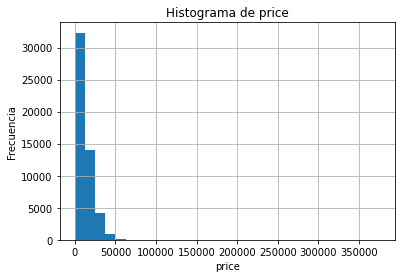

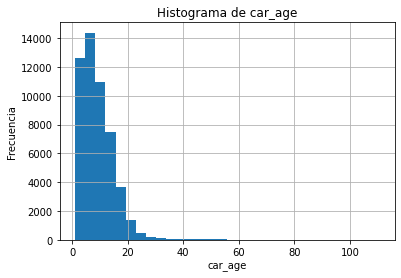

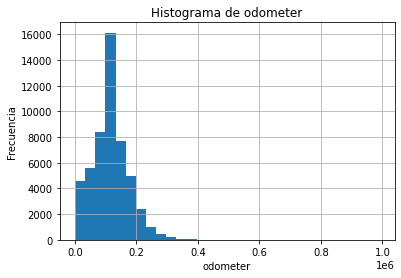

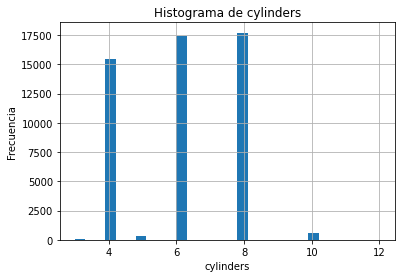

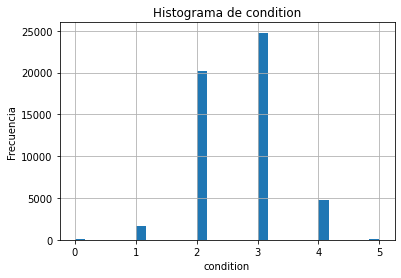

In [170]:
# Generar histogramas para cada parámetro
for column in prin_parameter:
    vehicles[column].hist(bins=30)
    plt.title('Histograma de ' + column)
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

**Observaciones**

1. Los histogramas anteriores revelan valores atípicos en las variables price, odometer y car_age. Estos valores atípicos son sugeridos por el flujo largo a la derecha que obliga a crear rangos extremos en el eje x de los gráficos con barras azules.

2. En el parámatro 'price' podemos ver que la distribución tiene un sesgo positivo con el pico alrededor de 5000.

3. Podemos ver que la distribución tiene un sesgo positivo con el pico alrededor de 10 en 'car_age'.

4. Vamos a crear una distribución de diagrama de caja para las variables price, odometer y car_age.

**- Parámatro: 'price'**

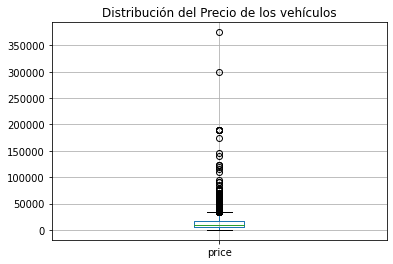

In [171]:
# crea diagramas de caja de la variable 'price'
vehicles.boxplot(column='price')
plt.title('Distribución del Precio de los vehículos')
plt.show()

- Podemos ver que hay varios valores fuera de los valores medios de nuestra caja. Con el histograma podiamos ver que los valores se centraban alrededor de 5,000; sin embargo, los bigotes resultaron ser asimétricos con respecto a la caja: el bigote inferior es 0, mientras que el bigote superior está por encima el límite superior de la caja.

**- Parámatro: 'car_age'**

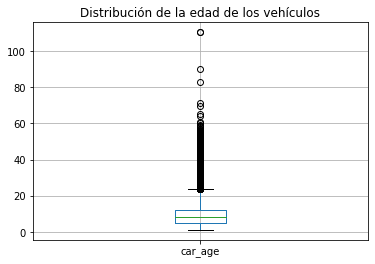

In [172]:
# crea diagramas de caja de la variable 'car_age'
vehicles.boxplot(column='car_age')
plt.title('Distribución de la edad de los vehículos')
plt.show()

**- Parámatro: 'odometer'**

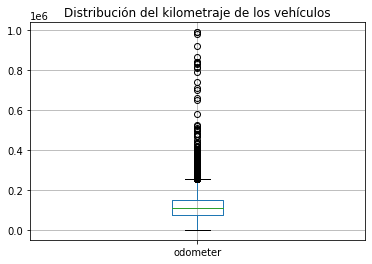

In [173]:
# crea diagramas de caja de la variable 'odometer'
vehicles.boxplot(column='odometer')
plt.title('Distribución del kilometraje de los vehículos')
plt.show()

## Estudiar parámetros principales y sus valores atípicos



Vamos a calcular el rango intercuartílico (IQR), es decir,  detectar los valores atípicos, en el rango entre el primer y el tercer cuartil (los bordes de la caja).

**Calcular IQR de las variables**


In [174]:
# Opción #1
IQR_price = (vehicles['price'].quantile(0.75))-(vehicles['price'].quantile(0.25))
print('IQR_price:', IQR_price)
IQR_car_age = (vehicles['car_age'].quantile(0.75))-(vehicles['car_age'].quantile(0.25))
print('IQR_car_age:', IQR_car_age)
IQR_odometer = (vehicles['odometer'].quantile(0.75))-(vehicles['odometer'].quantile(0.25))
print('IQR_odometer:', IQR_odometer)

IQR_price: 11839.0
IQR_car_age: 7.479961943092603
IQR_odometer: 72153.0


In [175]:
# Opción #2
def calcular_iqr(data, columna):
    q3 = data[columna].quantile(0.75)
    q1 = data[columna].quantile(0.25)
    iqr = q3 - q1
    return iqr

columnas = ['price', 'car_age', 'odometer']

for columna in columnas:
    iqr = calcular_iqr(vehicles, columna)
    print('IQR_' + columna + ':', iqr)

IQR_price: 11839.0
IQR_car_age: 7.479961943092603
IQR_odometer: 72153.0


**Determina los límites inferiores para valores atípicos**

In [176]:
# Opción 1
price_inf = vehicles['price'].quantile(0.25)-1.5*IQR_price
print('Límite inferior del precio:', price_inf)
car_age_inf = vehicles['car_age'].quantile(0.25)-1.5*IQR_car_age
print('Límite inferior de la edad del carro:', car_age_inf)
odometer_inf = vehicles['odometer'].quantile(0.25)-1.5*IQR_odometer
print('Límite inferior del kilometraje:', odometer_inf)

Límite inferior del precio: -12758.5
Límite inferior de la edad del carro: -6.497053327583729
Límite inferior del kilometraje: -32561.5


In [177]:
# Opción 2
def calcular_limite_inferior(data, columna, iqr):
    limite_inferior = data[columna].quantile(0.25) - 1.5 * iqr
    return limite_inferior

parametros = ['price', 'car_age', 'odometer']

for parametro in parametros:
    iqr = calcular_iqr(vehicles, parametro)
    limite_inferior = calcular_limite_inferior(vehicles, parametro, iqr)
    print('Límite inferior de', parametro + ':', limite_inferior)

Límite inferior de price: -12758.5
Límite inferior de car_age: -6.497053327583729
Límite inferior de odometer: -32561.5


**Observación:**

Se hace evidente la naturaleza atípica de los datos en estos 3 parámetros de nuestro DataFrame. 
El precio, la edad del carro y el kilometraje no pueden ser de naturaleza negativa.

**Determinar los límites superiores para valores atípicos**


In [178]:
def calcular_limite_superior(data, columna, iqr):
    limite_superior = data[columna].quantile(0.75) + 1.5 * iqr
    return limite_superior

parametros = ['price', 'car_age', 'odometer']

for parametro in parametros:
    iqr = calcular_iqr(vehicles, parametro)
    limite_superior = calcular_limite_superior(vehicles, parametro, iqr)
    print('Límite superior de', parametro + ':', limite_superior)

Límite superior de price: 34597.5
Límite superior de car_age: 23.422794444786682
Límite superior de odometer: 256050.5


In [179]:
# Almacena los datos sin valores atípicos en un DataFrame separado
vehicles_filtered= vehicles.query('(price<@price_sup) and (car_age<@car_age_sup) and (odometer<@odometer_sup)')

In [180]:
#Mostra nuevo DataFrame filtrado
vehicles_filtered.info()
vehicles_filtered.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48049 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         48049 non-null  int64         
 1   model_year    48049 non-null  float64       
 2   model         48049 non-null  object        
 3   condition     48049 non-null  int64         
 4   cylinders     48049 non-null  int64         
 5   fuel          48049 non-null  object        
 6   odometer      48049 non-null  int64         
 7   transmission  48049 non-null  object        
 8   type          48049 non-null  object        
 9   paint_color   48049 non-null  object        
 10  is_4wd        48049 non-null  bool          
 11  date_posted   48049 non-null  datetime64[ns]
 12  days_listed   48049 non-null  int64         
 13  year_posted   48049 non-null  int64         
 14  month_posted  48049 non-null  int64         
 15  day_posted    48049 non-null  int64 

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,car_age,car_miles
0,9400,2011.0,bmw x5,2,6,gas,145000,automatic,SUV,others,True,2018-06-23,19,2018,6,5,7.474486,19399.326923
1,25500,2011.0,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018,10,4,7.797559,11375.995773
2,5500,2013.0,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,3,6.100057,18032.618941
3,1500,2003.0,ford f-150,1,8,gas,181613,automatic,pickup,others,False,2019-03-22,9,2019,3,4,16.219361,11197.296785
4,14900,2017.0,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,1,2.247822,35991.734443


## Estudiar parámetros principales sin valores atípicos

**Histogramas de caja para cada uno de los parámetros en nuevo DataFrame:**

In [181]:
# Lista de nombres de los parámetros principales
prin_parameter_filtered = ['price', 'car_age', 'odometer']

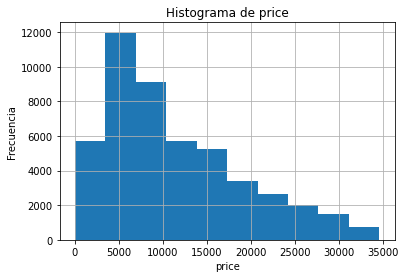

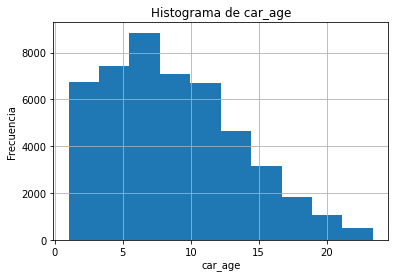

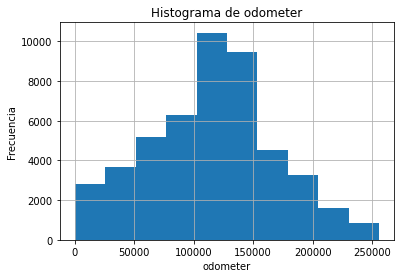

In [182]:
# Generar histogramas para cada parámetro
for column in prin_parameter_filtered:
    vehicles_filtered[column].hist()
    plt.title('Histograma de ' + column)
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

**Observaciones:**

1. Para el parámetro 'price' el nuevo histograma hace evidente la diferencia con el DataFrame original, y sus valores extremos. Ahora hay menos valores atípicos en el límite superior y se hace evidente un pico alrededor de 6000.
2. Para el parámetro 'price' el valor máximo está alredor de 34,00, lo que representa el precio más alto entre los vehículos en el conjunto de datos.
3. Al realizar el histograma usando el nuevo DataFrame para el parámetro 'car_age' , se hace evidente un pico entre 6 y 8 años, pero con una concentración fuerte de los datos en esta región igualemente por lo que podríamos inferir que la media de nuestros datos se encuentra en este rango.
4. En el parámetro 'car_age' valor mínimo es 0, lo cual podría indicar automóviles nuevos.
5. El valor máximo pasa los 20 años, lo que indica que tenemos vehículos antiguos o viejos.
6. En el parámetro 'odometer' se hace evidente un pico entre 100mil y 150mil millas. Lo que indica que la mitad de los vehículos tienen un odómetro igual o inferior a ese valor.
7. En el parámetro 'odometer' el valor mínimo para "odometer" es 0, lo que podría posiblemente indicar vehículos nuevos sin uso registrado en el odómetro. 

## Periodo de colocación de los anuncios

A continuación se muestra cuántos días los anuncios fueron mostrados (days_listed), su media y su mediana. También proveer un analisis de los anuncios que se eliminaron rápidamente y los anuncios que se publicaron durante un tiempo inusualmente largo.

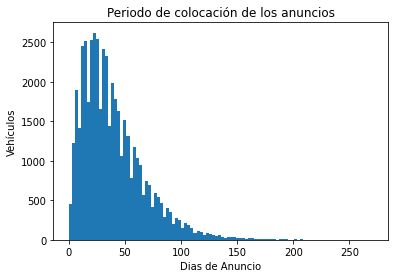

In [183]:
# Parámetro 'days_listed'
plt.hist(vehicles_filtered['days_listed'], bins=100)
plt.title('Periodo de colocación de los anuncios')
plt.ylabel('Vehículos')
plt.xlabel('Dias de Anuncio');

**Observación:**

El histograma anterior revela anuncios que pasan mucho tiempo antes de ser eliminados, indicado por la cola larga a la derecha.

In [184]:
vehicles_filtered['days_listed'].describe()

count    48049.000000
mean        39.546005
std         28.213336
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

**Anuncios que pasan mucho tiempo antes de ser eliminados:**

In [185]:
# Valor máximo en days_listed
days_listed_max= vehicles_filtered[vehicles_filtered['days_listed'] == vehicles_filtered['days_listed'].max()]
days_listed_max.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,car_age,car_miles
4360,5200,2011.0,chevrolet impala,4,6,gas,122000,automatic,sedan,others,False,2018-05-24,271,2018,5,3,7.392349,16503.55


**Observaciones:**

- En promedio, los anuncios permanecen durante 39,5 días antes de ser eliminados. Por otro lado, el 50% de los anuncios se eliminan dentro de los 33,0 días posteriores a su publicación.
Y como mencionamos anteriormente, el histograna revelo que hay anuncios que pasan mucho tiempo antes de ser eliminados. Aquí podemos observas un valor máximo de 271 días. 

- Descubrimos que el chevrolet impala del 2011 con 16503.55 millas duro publicado por 271 días.

**Anuncios que se eliminaron rápidamente:**

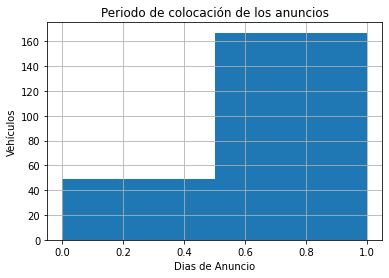

In [186]:
# Anuncios que se eliminaron rápidamente, el mismo día o al día siguiente
days_listed_min = vehicles_filtered.query('-1 <days_listed < 2')
days_listed_min.hist('days_listed', bins=2)
plt.title('Periodo de colocación de los anuncios')
plt.ylabel('Vehículos')
plt.xlabel('Dias de Anuncio');

In [187]:
# Valor mínimo en days_listed
days_listed_min= len(vehicles_filtered[vehicles_filtered['days_listed']<=1])
print(f'{days_listed_min} anuncios han eliminados dentro de 1 día de la publicación.')

216 anuncios han eliminados dentro de 1 día de la publicación.


## Precio promedio por cada tipo de vehículo

Comparando el número de anuncios y el precio medio de cada tipo de vehículo. Podemos crear un gráfico que represente la relación entre la cantidad de anuncios y los tipos de vehículos. Elegiremos los dos tipos con más anuncios.

- Primero, veamos qué tipo de vehículo tiene el precio más alto, en promedio.

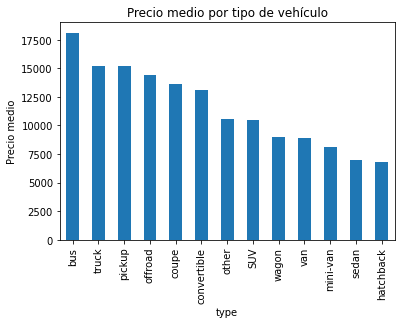

In [188]:
type_grouped = vehicles_filtered.pivot_table(index='type', values='price', aggfunc=['count','mean'])

type_grouped['mean'].sort_values(by='price', ascending=False).plot(kind='bar', legend=False)
plt.title('Precio medio por tipo de vehículo')
plt.ylabel('Precio medio');

**Observación:**

De acuerdo al gráfico vemos que Bus y Truck (camionetas) son los tipos de vehículos que cuestan más en promedio.

- Ahora trazaremos un gráfico que muestre la dependencia de la cantidad de anuncios en el tipo de vehículo e identificaremos los dos tipos con la mayor cantidad de anuncios.

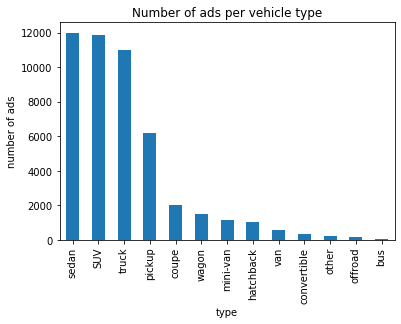

In [189]:
type_grouped['count'].sort_values(by='price', ascending=False).plot(kind='bar', legend=False)
plt.title('Number of ads per vehicle type')
plt.ylabel('number of ads');

**Observación:**

De la gráfica anterior encontramos los vehículos que cuestan más en promedio, y ahora observamos que de estos vehículos, los dos tipos de vehículos que tienen la mayoria de anuncios o que se anuncian más frecuentemente son 'Sedan'y 'SUV'.

## Factores de precio

A continuación vamos a investigar ¿qué factores impactan más sobre el precio? de los tipos más populares que hemos detectado en la fase anterior y estudiaremos si el precio depende de la edad, kilometraje, condición, tipo de transmisión y color. 

Para las variables categóricas (tipo de transmisión y color) trazaremos gráficos de caja y bigotes. Para las otras variable crearemos gráficos de dispersión. 

Como condición para nuestros analices de variables categóricas, nuestros datos deben tener al menos 50 anuncios. 

In [190]:
popular_types = vehicles_filtered[vehicles_filtered['type'].isin(['SUV', 'sedan'])]
popular_types.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,car_age,car_miles
0,9400,2011.0,bmw x5,2,6,gas,145000,automatic,SUV,others,True,2018-06-23,19,2018,6,5,7.474486,19399.326923
2,5500,2013.0,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019,2,3,6.100057,18032.618941
4,14900,2017.0,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019,4,1,2.247822,35991.734443
5,14990,2014.0,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2018,6,2,4.465526,12978.089421
6,12990,2015.0,toyota camry,3,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,2018,12,3,3.986393,19870.596779


**- Edad vs. Precio**

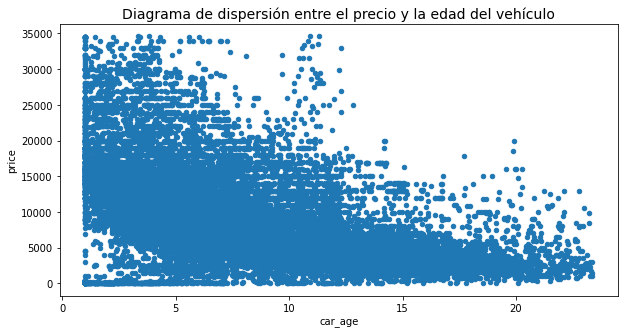

In [191]:
popular_types.plot.scatter(x='car_age', y='price', figsize=(10,5))
plt.title('Diagrama de dispersión entre el precio y la edad del vehículo', fontsize = 14);

**Conclusión intermedia:**

Podemos observar que el precio tiene una correlación negativa con la edad del vehículo. Es decir, cuanto más antiguo es el vehículo, menor es el precio. Los vehículos más nuevos o los vehículos con menos de 5 años tienen un precio más alto, lo cual es una conclusión razonable.

**- Kilometraje vs. Precio**

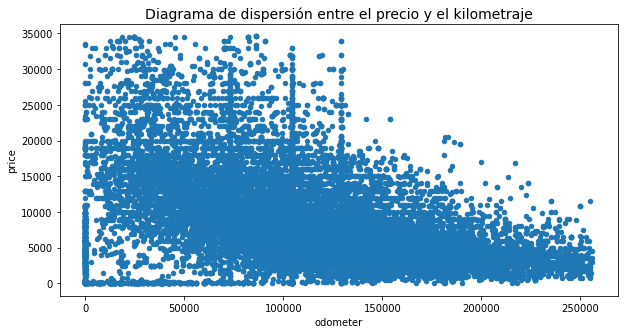

In [192]:
popular_types.plot.scatter(x='odometer', y='price', figsize=(10,5))
plt.title('Diagrama de dispersión entre el precio y el kilometraje', fontsize = 14);

**Conclusión intermedia:**

Podemos observar que el precio tiene una correlación negativa con el kilometraje del vehículo. Es decir, cuanto más kilometros tiene el carro, menor es el precio. Los vehículos más nuevos o los vehículos con menos de 100000 millas tienen un precio más alto, en comparación con vehículos con alto kilometraje, menor es su precio; lo cual es una conclusión razonable.

**- Estado vs. Precio**

Recordemos el significado de la columna estado:

- nuevo = 5
- como nuevo = 4
- excelente = 3
- bien = 2
- bastante = 1
- para rescate = 0

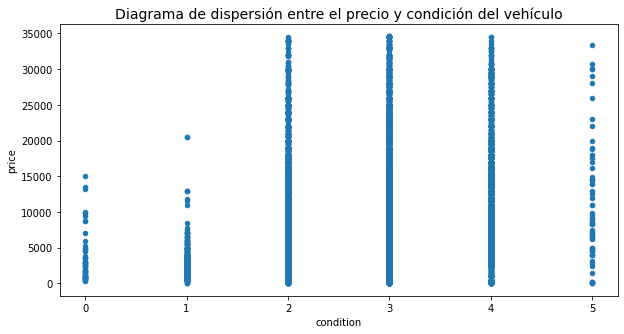

In [193]:
popular_types.plot.scatter(x='condition', y='price',  figsize=(10,5))
plt.title('Diagrama de dispersión entre el precio y condición del vehículo', fontsize=14);

**Conclusión intermedia:**

- Vemos que cuanto más antiguo es un vehículo, menor es su precio, lo cual es bastante razonable.
- Observamos a partir de los datos que los vehículos con condiciones buenas, excelentes y como nuevas tienen el precio más alto que los vehículos con otras condiciones.

**- Precio vs. Tipo de Transmisión**
(Variable categórica)

In [194]:
# verifiquemos si el tipo de transmisión tiene al menos 50 anuncios.
popular_types.transmission.value_counts()

automatic    22524
manual        1024
other          290
Name: transmission, dtype: int64

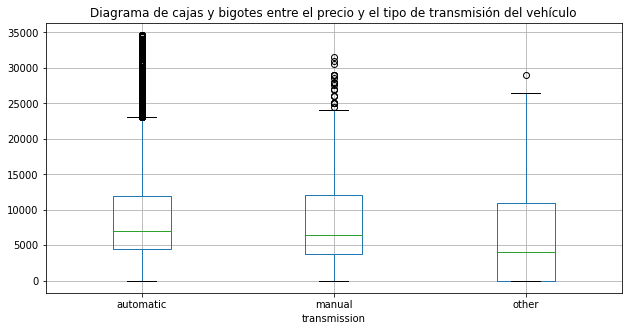

In [195]:
popular_types.boxplot(by='transmission', column='price', figsize=(10,5))
plt.suptitle('')
plt.title('Diagrama de cajas y bigotes entre el precio y el tipo de transmisión del vehículo');

**Conclusión intermedia:**

Vemos que los carros automaticos tienden a ser levemente más costosos, en comparación a un carro manual.

**- Precio vs. Tipo de Color**
(Variable categórica)

In [196]:
# verifiquemos si el Tipo de Color tiene al menos 50 anuncios.
popular_types.paint_color.value_counts()


others    4287
black     3839
silver    3562
white     3350
grey      2754
blue      2226
red       1802
green      608
brown      600
custom     593
orange      90
yellow      66
purple      61
Name: paint_color, dtype: int64

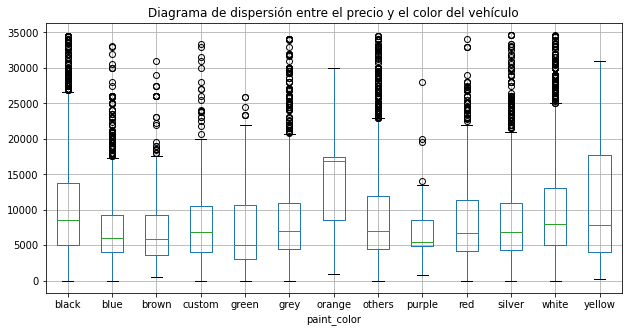

In [197]:
popular_types.boxplot(by='paint_color', column='price', figsize=(10,5))
plt.suptitle('')
plt.title('Diagrama de dispersión entre el precio y el color del vehículo');

**Conclusión intermedia:**

Del diagrama de dispersión entre el precio y el color del vehículo no hay una diferencia clara en el precio según el color, por lo que el color de la pintura no sería un buen predictor del precio.

**Matriz de correlación:**

In [198]:
variables_numericas = ['price', 'model_year', 'condition', 'cylinders', 'odometer', 'days_listed', 'car_age', 'car_miles']
print(vehicles_filtered[variables_numericas].corr())

                price  model_year  condition  cylinders  odometer  \
price        1.000000    0.511523   0.181289   0.314025 -0.406568   
model_year   0.511523    1.000000   0.265021  -0.150754 -0.531182   
condition    0.181289    0.265021   1.000000  -0.080816 -0.301138   
cylinders    0.314025   -0.150754  -0.080816   1.000000  0.111605   
odometer    -0.406568   -0.531182  -0.301138   0.111605  1.000000   
days_listed -0.001600   -0.003472   0.000277   0.002619  0.006035   
car_age     -0.510746   -0.998255  -0.264357   0.150893  0.528635   
car_miles    0.226927    0.506460   0.032070  -0.046044  0.134913   

             days_listed   car_age  car_miles  
price          -0.001600 -0.510746   0.226927  
model_year     -0.003472 -0.998255   0.506460  
condition       0.000277 -0.264357   0.032070  
cylinders       0.002619  0.150893  -0.046044  
odometer        0.006035  0.528635   0.134913  
days_listed     1.000000  0.003880  -0.001461  
car_age         0.003880  1.000000  -0.508

**Conclusión intermedia:**

La matriz de correlación trae las principales variables que afectan el precio. La edad del vehículo (car_age) y el kilometraje (odometer) tienen las correlaciones más altas con el precio, pero correlaciones negativas, como debería ser, ya que los vehículos con más años y mayor kilometraje suelen tener los precios de venta más bajos.

## Conclusión general

1. Se hizo evidente que existía valores ausentes en las categorías: model_year, cylinders, odometer, paint_color y is_4wd.

2. Aunque la cantidad de valores faltantes en 'model_year' representaba menos del 10% del DataFrame, en lugar de eliminarlos, se optó por reemplazarlos por la mediana utilizando el parámetro 'model' como referencia.

3. Nuevamente, se recurrió al modelo del vehículo (model) para completar los valores faltantes en el parámetro de cilindros (cylinders), ya que los modelos son indicativos de la fabricación y las especificaciones del motor.

4. Cuando se trata de vehículos, aquellos con un alto kilometraje pueden sufrir depreciación y daños. Con esto en mente, se utilizó la variable "estado" (condition) para completar los valores faltantes en el odómetro.

5. Dado que "paint_color" es una variable categórica y tenía valores faltantes, se optó por reemplazarlos con una nueva categoría denominada "other". Esto se debe a que no es posible calcular la mediana de una variable categórica.

6. El porcentaje de valores faltantes en la variable is_4wd era de 50.37%  por  lo que se identificó como booleana. Por lo tanto, fue fácil completar o reemplazar estos valores faltantes con ceros.

7. Otro análisis que se realizó fue el tratamiento de los valores atípicos. La creación de intervalos intercuartílicos (IQR) fue fundamental para identificar y tratar estos valores.

8. En promedio encontramos que los anuncios permanecen durante 39,5 días antes de ser eliminados. Por otro lado, el 50% de los anuncios se eliminan dentro de los 33,0 días posteriores a su publicación. Y como mencionamos anteriormente, hay anuncios que pasan mucho tiempo antes de ser eliminados con un valor máximo de 271 días.

9. También observamos que alrededor de 216 anuncios se eliminaron rápidamente después de 1 día.

10.  Encontramos que los buses  y Truck (camionetas) son los tipos de vehículos que cuestan más en promedio, sin embargo, de los vehículos que cuestan más en promedio, los dos tipos de vehículos que tienen la mayoría de anuncios son 'Sedan'y 'SUV'.

11. Se comprobó que el precio tiene una correlación negativa con la edad del vehículo. Es decir, cuanto más antiguo es el vehículo, menor es el precio. Los vehículos más nuevos o los vehículos con menos de 5 años tienen un precio más alto, lo cual es una conclusión razonable.

12. Se comprobó que el precio tiene una correlación negativa con el kilometraje del vehículo. Es decir, cuanto más kilómetros tiene el carro, menor es el precio. Los vehículos más nuevos o los vehículos con menos de 100,000 millas tienen un precio más alto, en comparación con vehículos con alto kilometraje, menor es su precio; lo cual es una conclusión razonable.

13. Se comprobó que en promedio, cuanto mejor sea el estado de un vehículo, mayor es el precio.

14. No encontramos una conexión clara entre el precio y el color de la pintura, y asumimos que depende principalmente de las preferencias de los clientes.